In [179]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.patches import Rectangle

In [289]:
MS=glob('C:/Users/gjc10/Downloads/starFiles/starFiles/mainSequence/ms*.txt')
Giants=glob('C:/Users/gjc10/Downloads/starFiles/starFiles/Giants/giant*.txt')
SubGiant='C:/Users/gjc10/Downloads/starFiles/starFiles/subGiant/subG1.txt'
gals=glob('C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra/*.txt')
gals_pics=glob('C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra/*.tiff')
print(gals_pics)

['C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\a.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\b.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\c.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\d.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\e.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\f.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\g.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\h.tiff', 'C:/Users/gjc10/Downloads/Galaxy_Spectra/Galaxy_Spectra\\i.tiff']


In [4]:
MS_spec=[np.transpose(np.loadtxt(el)) for el in MS]
Giants_spec=[np.transpose(np.loadtxt(el,usecols=[0,1])) for el in Giants]
Sub_Giant_spec=np.transpose(np.loadtxt(SubGiant,usecols=[0,1]))
Gal_specs=[np.transpose(np.loadtxt(el,usecols=[0,1])) for el in gals]


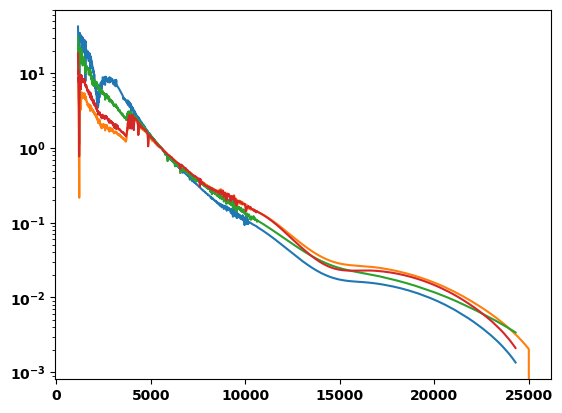

In [43]:
ind=0
#plt.plot(MS_spec[6][0],MS_spec[6][1])
#plt.plot(Sub_Giant_spec[0],Sub_Giant_spec[1])
plt.plot(Giants_spec[ind][0],Giants_spec[ind][1])
plt.plot(MS_spec[ind+1][0],MS_spec[ind+1][1])
plt.plot(Giants_spec[ind+3][0],Giants_spec[ind+3][1])
plt.plot(Sub_Giant_spec[0],Sub_Giant_spec[1])
plt.yscale('log')
#plt.xlim(3500,7000)

In [82]:
#Classifications made by observing the peak wavelength, assuming lower peak wavelength is higher temp from Wiens Law
#Note RG1 is actually quite blue but less blue than blue giants

O=np.asarray([MS_spec[6][0][500:1191],MS_spec[6][1][500:1191]])
B=np.asarray([MS_spec[1][0][500:1191],MS_spec[1][1][500:1191]])
A=np.asarray([MS_spec[0][0][500:1191],MS_spec[0][1][500:1191]])
F=np.asarray([MS_spec[2][0][500:1191],MS_spec[2][1][500:1191]])
G=np.asarray([MS_spec[3][0][500:1191],MS_spec[3][1][500:1191]])
K=np.asarray([MS_spec[4][0][500:1191],MS_spec[4][1][500:1191]])
M=np.asarray([MS_spec[5][0][500:1191],MS_spec[5][1][500:1191]])
BG_1=np.asarray([Giants_spec[0][0][500:1191],Giants_spec[0][1][500:1191]])
BG_2=np.asarray([Giants_spec[3][0][500:1191],Giants_spec[3][1][500:1191]])
RG_1=np.asarray([Giants_spec[1][0][500:1191],Giants_spec[1][1][500:1191]])
RG_2=np.asarray([Giants_spec[2][0][500:1191],Giants_spec[2][1][500:1191]])
SG=np.asarray([Sub_Giant_spec[0][500:1191],Sub_Giant_spec[1][500:1191]])

## Elliptical Galaxy Synthesis ##
Since no star formation the stars chosen are old (cold) stars \
Proportions chosen based on fitting and main sequence last longer\
Important to note proportion is the proportion of light not number proportions hence more K \
Galaxies fit against are ones classified as ellipticals from images and spectral examination \
20% G\
55% K\
5%  M\
5% Red_Giant 1\
15% Red_Giant 2\
Higher proportion of RG2 is due to RG1 being very blue for a red giant

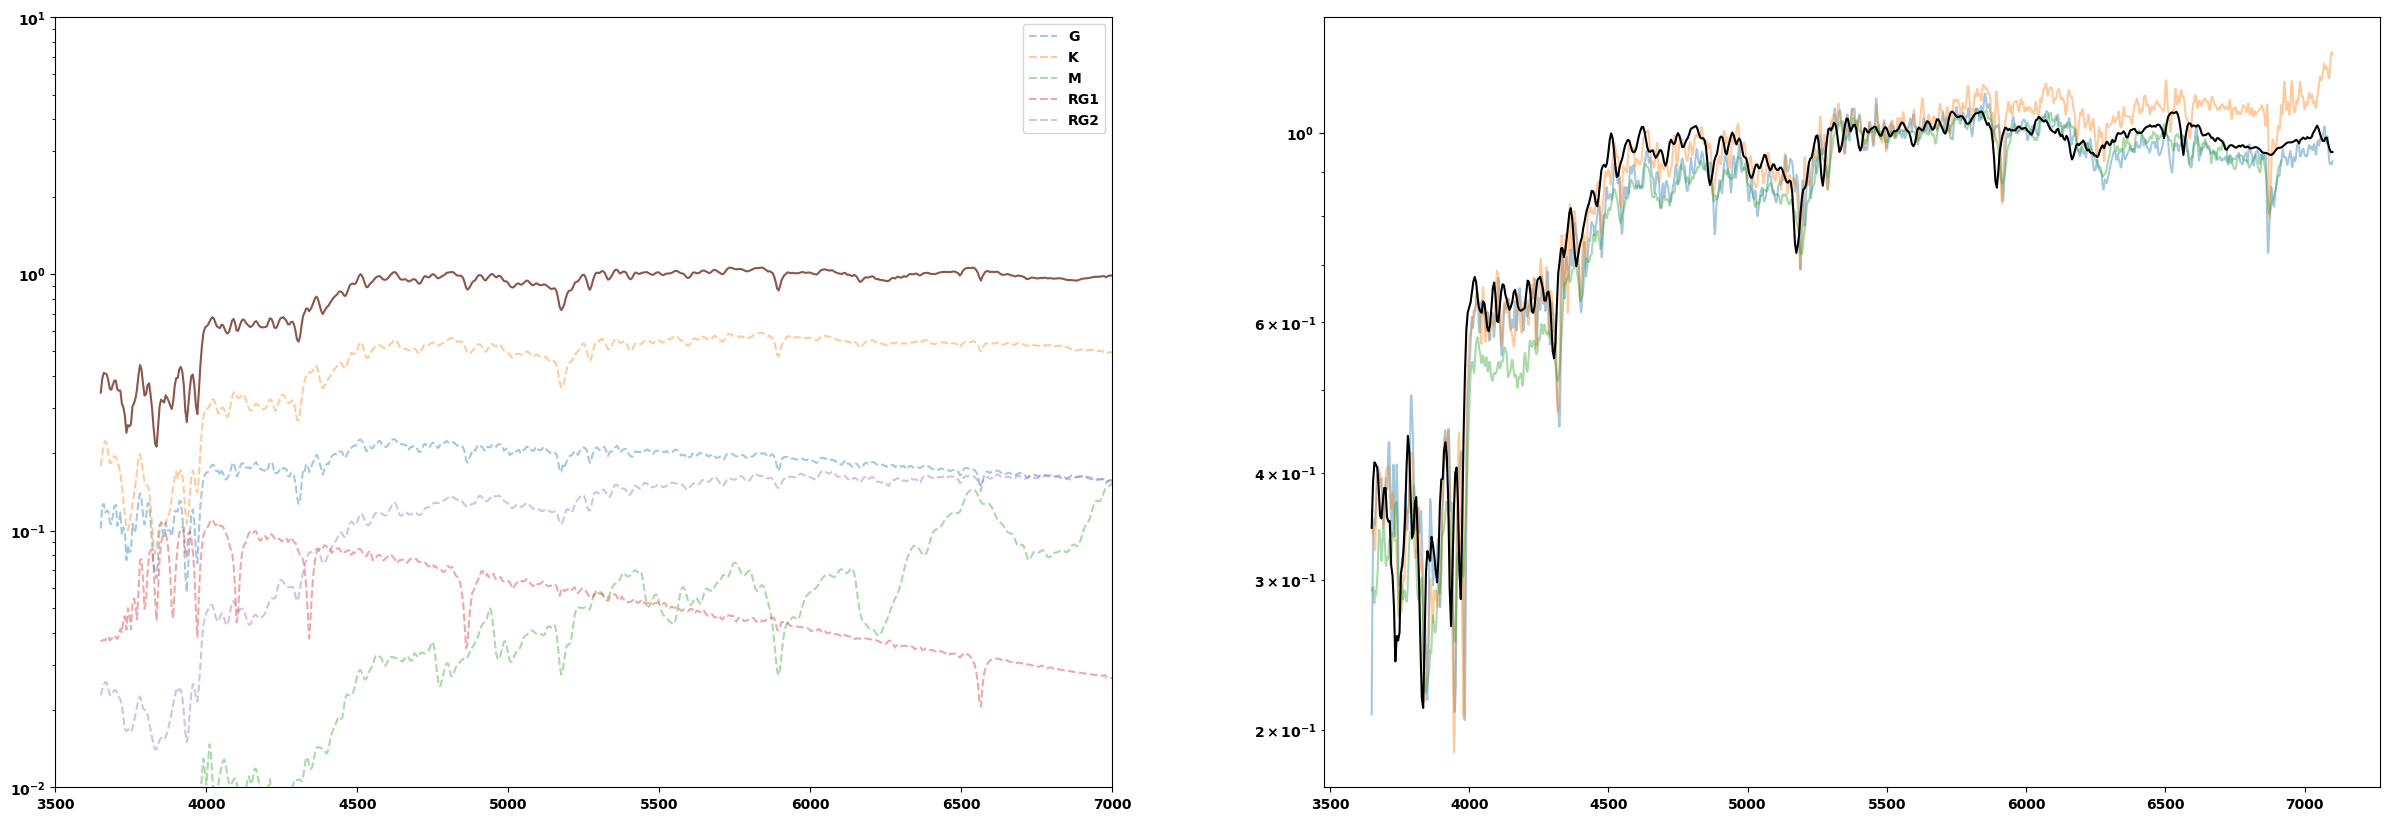

In [168]:
specs=[G[1],K[1],M[1],RG_1[1],RG_2[1]]
coefficients=[0.2,0.55,0.05,0.05,0.15]
result=np.zeros(len(MS_spec[5][1][500:1191]))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 10))
labels=['G','K','M','RG1','RG2']
for num,spec in enumerate(specs):
    result+=coefficients[num]*spec
    if coefficients[num]!=0:
        ax1.plot(G[0],coefficients[num]*spec,ls='--',alpha=0.4,label=f'{labels[num]}')
ax1.legend()
ax1.plot(G[0],result)
ax1.set_yscale('log')
ax1.set_xlim(3500,7000)
ax1.set_ylim(0.01,10)
ax2.plot(Gal_specs[3][0],Gal_specs[3][1],alpha=0.4)
ax2.plot(Gal_specs[5][0],Gal_specs[5][1],alpha=0.4)
ax2.plot(Gal_specs[6][0],Gal_specs[6][1],alpha=0.4)
ax2.plot(G[0],result,color='black')
ax2.set_yscale('log')

## Spiral Galaxy ##
Bulge and Disk modelled entirely separetly to discuss different population \
Bulge is made up of old stars hence the red stars chosen similar to those in ellipticals although slightly younger hence different proportions\
Disk is made up of younger stars hence bluer stars chosen \
From project work on galaxies a significant proportion of the overall light originates from bulge hence large bulge proportion \
Same idea of fitting to identified spiral galaxies, avoiding major star burst spirals\

#### Bulge (90% Overall) ####
30% K\
40% G\
10% Red_Giant 1\
10% Red_Giant 2\
10% M

#### Disk (10% Overall) ####
10% B\
20% A\
40% F\
15% Blue Giant 1\
5% Blue Giant 2\
10% Sub Giant

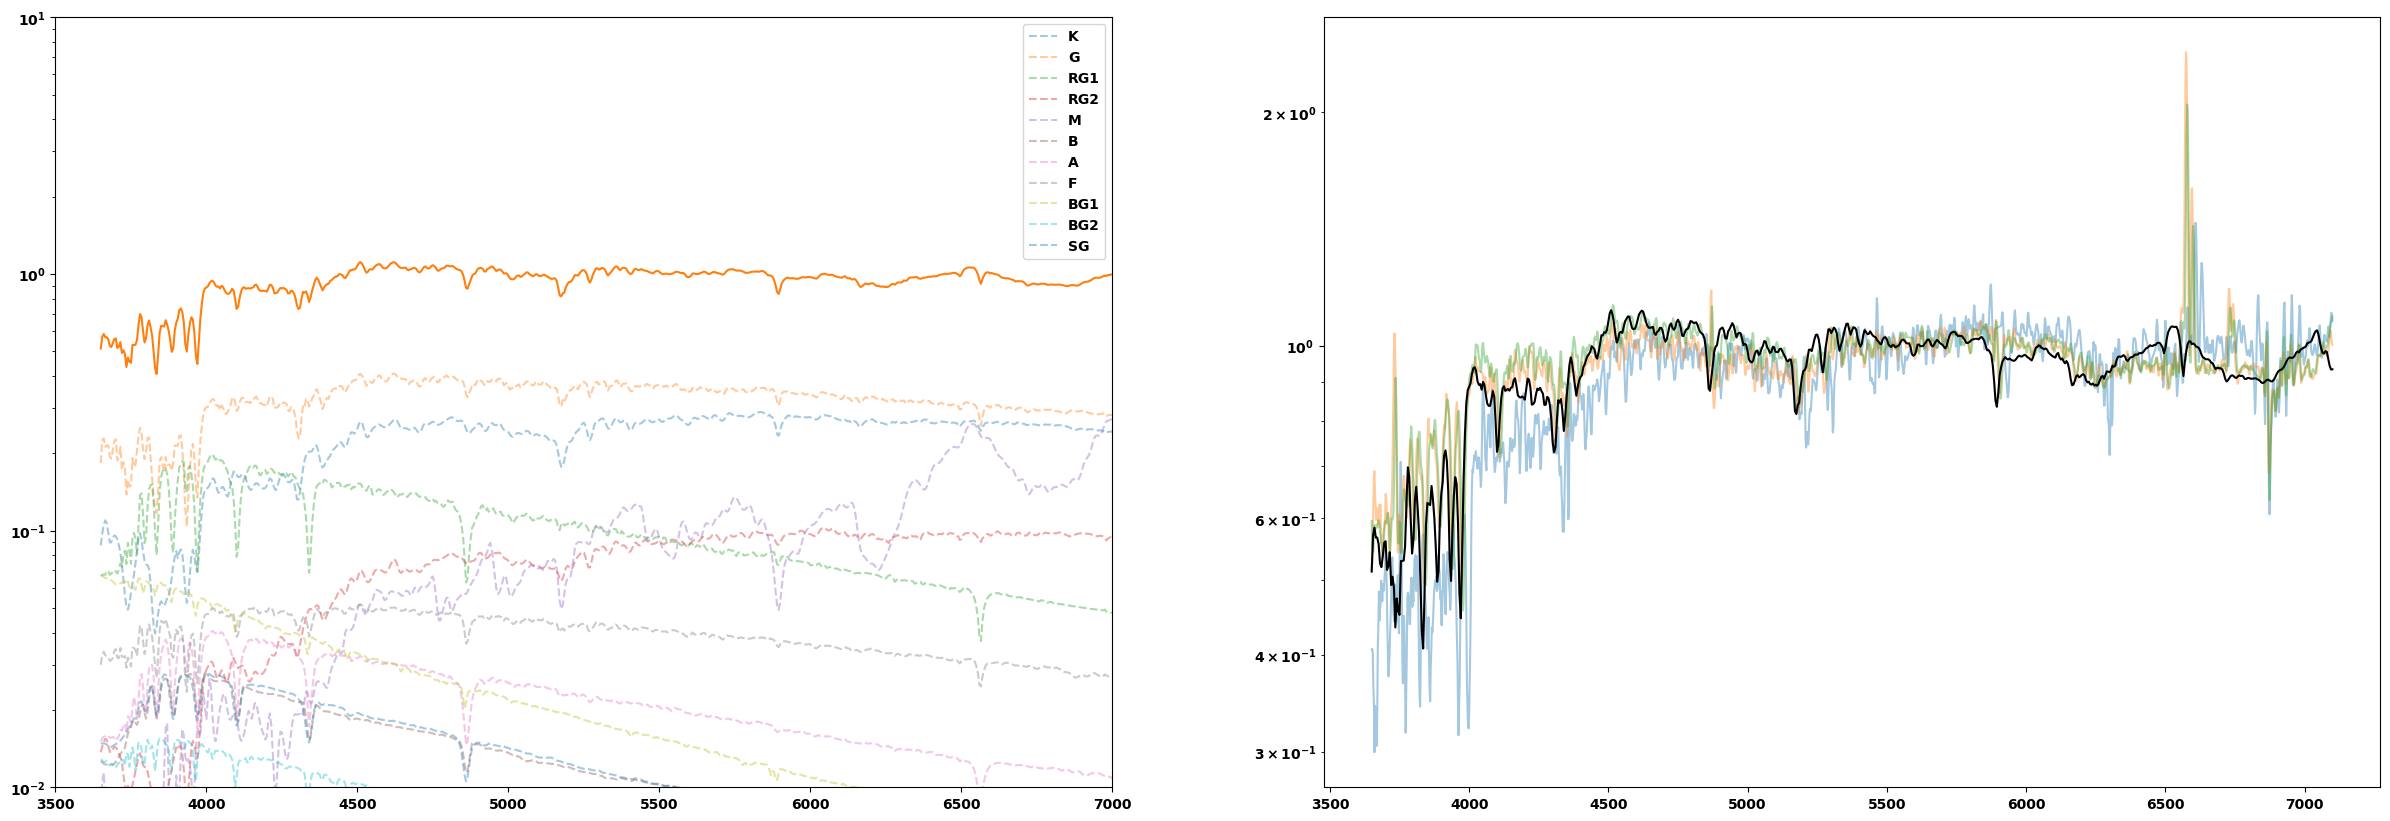

In [167]:
bulge_prop=0.9
disk_prop=0.1
bulge_specs=[K[1],G[1],RG_1[1],RG_2[1],M[1]]
bulge_coefficients=[0.3,0.4,0.10,0.10,0.10]
bulge_result=np.zeros(len(MS_spec[5][1][500:1191]))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 10))
bulge_labels=['K','G','RG1','RG2','M']
for num,spec in enumerate(bulge_specs):
    bulge_result+=bulge_coefficients[num]*spec
    if bulge_coefficients[num]!=0:
        ax1.plot(G[0],bulge_coefficients[num]*spec*bulge_prop,ls='--',alpha=0.4,label=f'{bulge_labels[num]}')
disk_specs=[B[1],A[1],F[1],BG_1[1],BG_2[1],SG[1]]
disk_coefficients=[0.1,0.2,0.4,0.15,0.05,0.1]
disk_result=np.zeros(len(MS_spec[5][1][500:1191]))
disk_labels=['B','A','F','BG1','BG2','SG']
for num,spec in enumerate(disk_specs):
    disk_result+=disk_coefficients[num]*spec
    if disk_coefficients[num]!=0:
        ax1.plot(G[0],disk_coefficients[num]*spec*disk_prop,ls='--',alpha=0.4,label=f'{disk_labels[num]}')
ax1.legend()
ax1.plot(G[0],bulge_prop*bulge_result+disk_prop*disk_result)
ax1.set_yscale('log')
ax1.set_xlim(3500,7000)
ax1.set_ylim(0.01,10)
ax2.plot(Gal_specs[0][0],Gal_specs[0][1],alpha=0.4)
ax2.plot(Gal_specs[2][0],Gal_specs[2][1],alpha=0.4)
ax2.plot(Gal_specs[4][0],Gal_specs[4][1],alpha=0.4)
ax2.plot(G[0],bulge_prop*bulge_result+disk_prop*disk_result,color='black')
ax2.set_yscale('log')

## Starburst Galaxy ##
OB stars in the disk, generally more young bluer stars in the disk since very high SFR \
Since more bright stars in disk, makes up larger of the overall galaxy light \
MS Stars still dominant due to short lifetime outside of MS \
Galaxies chosen to fit against were chosen to be the somewhat spiral looking starburst ones with a central bulge \
Bulge left unchanged as not much difference in SFR there

#### Bulge (90% Overall) ####
30% K\
40% G\
10% Red_Giant 1\
10% Red_Giant 2\
10% M

#### Disk (10% Overall) ####
25% O\
25% B\
20% A\
20% F\
5% Blue Giant 1\
5% Blue Giant 2

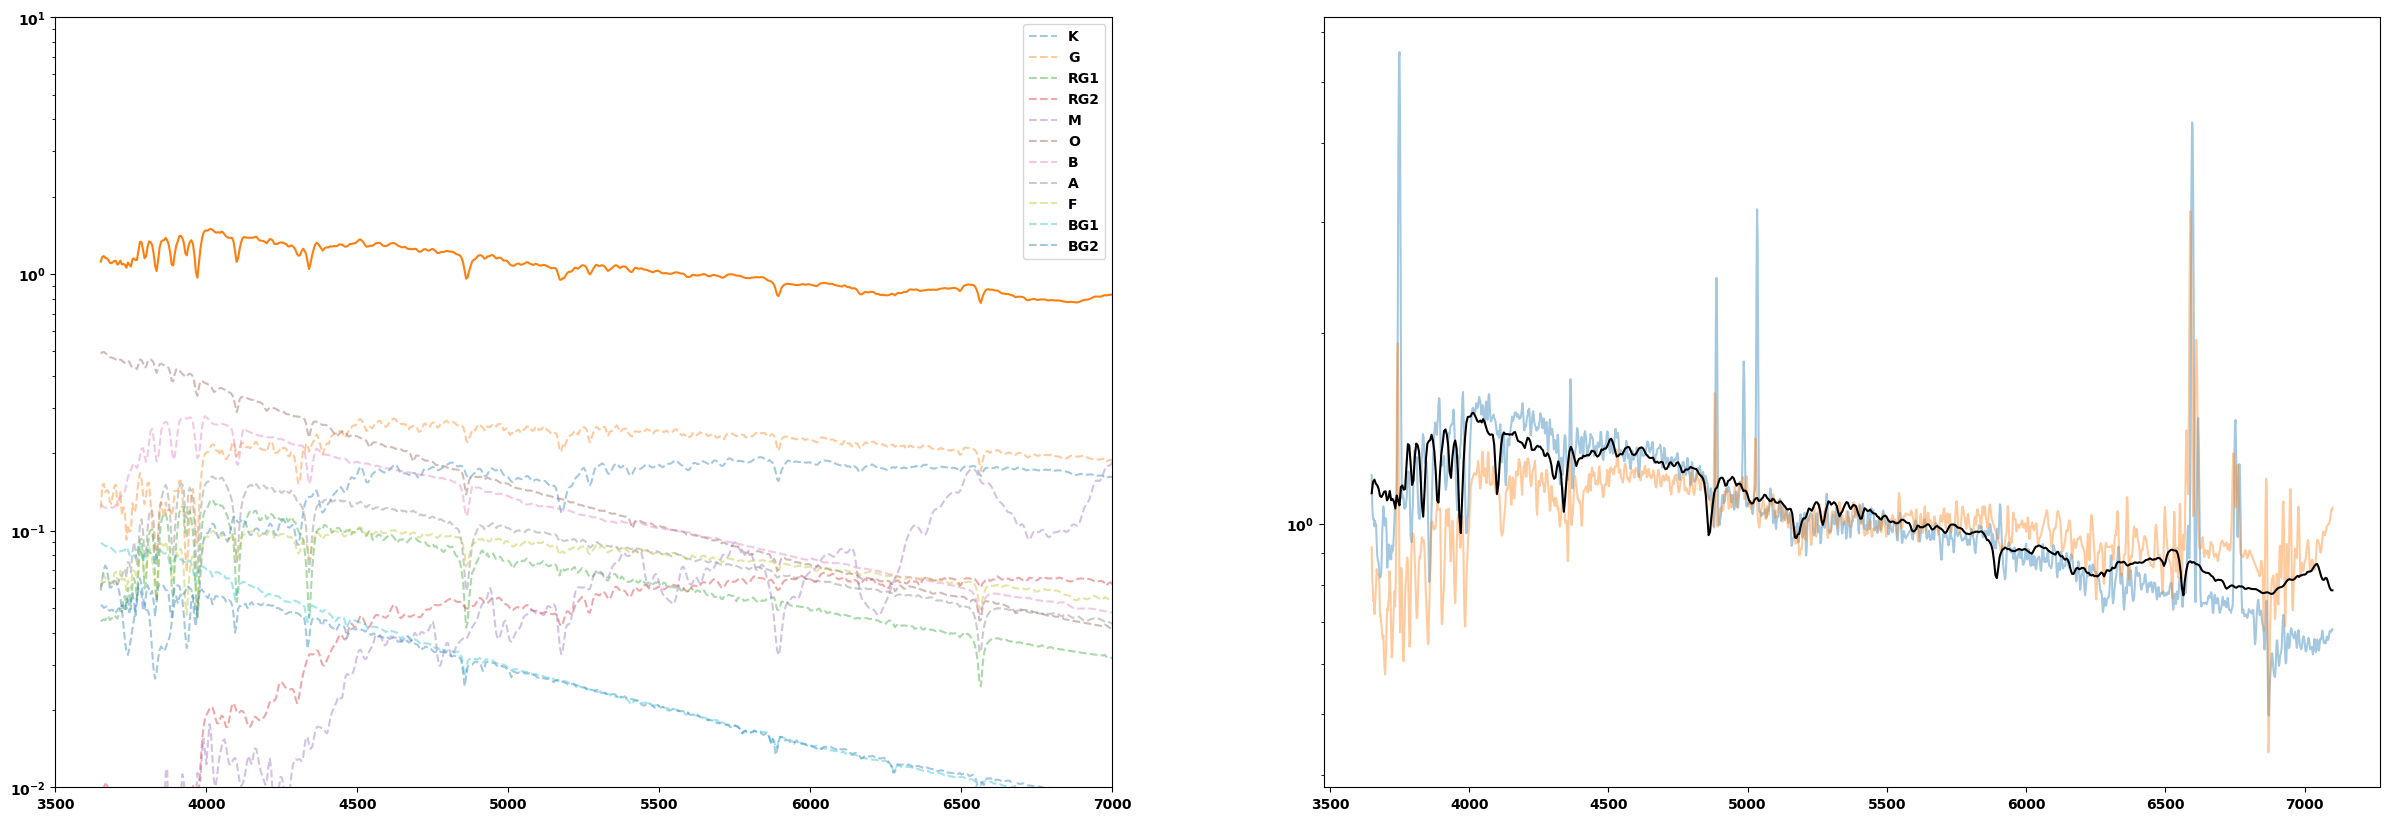

In [166]:
bulge_prop=0.6
disk_prop=0.4
bulge_specs=[K[1],G[1],RG_1[1],RG_2[1],M[1]]
bulge_coefficients=[0.3,0.4,0.10,0.10,0.10]
bulge_result=np.zeros(len(MS_spec[5][1][500:1191]))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(30, 10))
bulge_labels=['K','G','RG1','RG2','M']
for num,spec in enumerate(bulge_specs):
    bulge_result+=bulge_coefficients[num]*spec
    if bulge_coefficients[num]!=0:
        ax1.plot(G[0],bulge_coefficients[num]*spec*bulge_prop,ls='--',alpha=0.4,label=f'{bulge_labels[num]}')
disk_specs=[O[1],B[1],A[1],F[1],BG_1[1],BG_2[1]]
disk_coefficients=[0.25,0.25,0.2,0.20,0.05,0.05]
disk_result=np.zeros(len(MS_spec[5][1][500:1191]))
disk_labels=['O','B','A','F','BG1','BG2']
for num,spec in enumerate(disk_specs):
    disk_result+=disk_coefficients[num]*spec
    if disk_coefficients[num]!=0:
        ax1.plot(G[0],disk_coefficients[num]*spec*disk_prop,ls='--',alpha=0.4,label=f'{disk_labels[num]}')
ax1.legend()
ax1.plot(G[0],bulge_prop*bulge_result+disk_prop*disk_result)
ax1.set_yscale('log')
ax1.set_xlim(3500,7000)
ax1.set_ylim(0.01,10)
ax2.plot(Gal_specs[7][0],Gal_specs[7][1],alpha=0.4)
ax2.plot(Gal_specs[8][0],Gal_specs[8][1],alpha=0.4)
ax2.plot(G[0],bulge_prop*bulge_result+disk_prop*disk_result,color='black')
ax2.set_yscale('log')

## Q3 ##

This question was achieved by examining the differences between the synthesised spectra and the examples of their respective galaxy types.\
The first thing noted was the dip near the end of the spectrum in all 3 cases in some of the sample spectra, these are likely telluric lines due to oxygen as outlined in G. CATANZARO 1998. These were then ignored and highlighted in the spectra as they are not related to the galaxy.\

In the elliptical case, there are no substantial differences between the synthesised and example galaxies. This is due to the lack of gas in the ISM of these galaxies as well as the general lack of young hot stars to ionise and excite the little gas that is there. The only potential difference worth noting is that any extinction/absorbtion within the galaxy would cause decreased flux in the UV/Blue with re-emission in the FIR, this likely can't be seen since the fitting may have an excessive proportion of hotter stars, compensating for this which may not be true. Since the galaxy spectra do not go past the optical, this cannot be examined further.\

In the spiral case, the most clear difference is the presence of the H $\alpha$ line, who's presence can be explained by the ionisation and excitation of the gas around the OB stars in the HII regions of the galaxy. These stars are also responsible for the other emission lines that can be seen. The increase in gas content compared to the ellipticals also means there are absorption lines present such as the H $\gamma$ line. An interesting comment is the addition of gas causes the H $\beta$ line to go from being in absoprtion into emission. Yet again due to the presence gas and dust in spiral galaxies, it is possible that the UV/Blue light of the galaxy is being partially absorbed an re-emitted in the FIR with this being hidden by the fitting process and spectral range as mentioned previously.

In the starburst case the difference between synthesised and sample is clear, there are a large number of emission lines due to the high level of ionisation and excitation due to the high proportion of very hot, blue stars in starburst galaxies. Since there is a high amount of gas allowing for the starburst, there is plenty of gas to be excited to create these lines. The same UV absorption and FIR emission caveat applies here too.



Text(0.5, 1.0, 'Starburst')

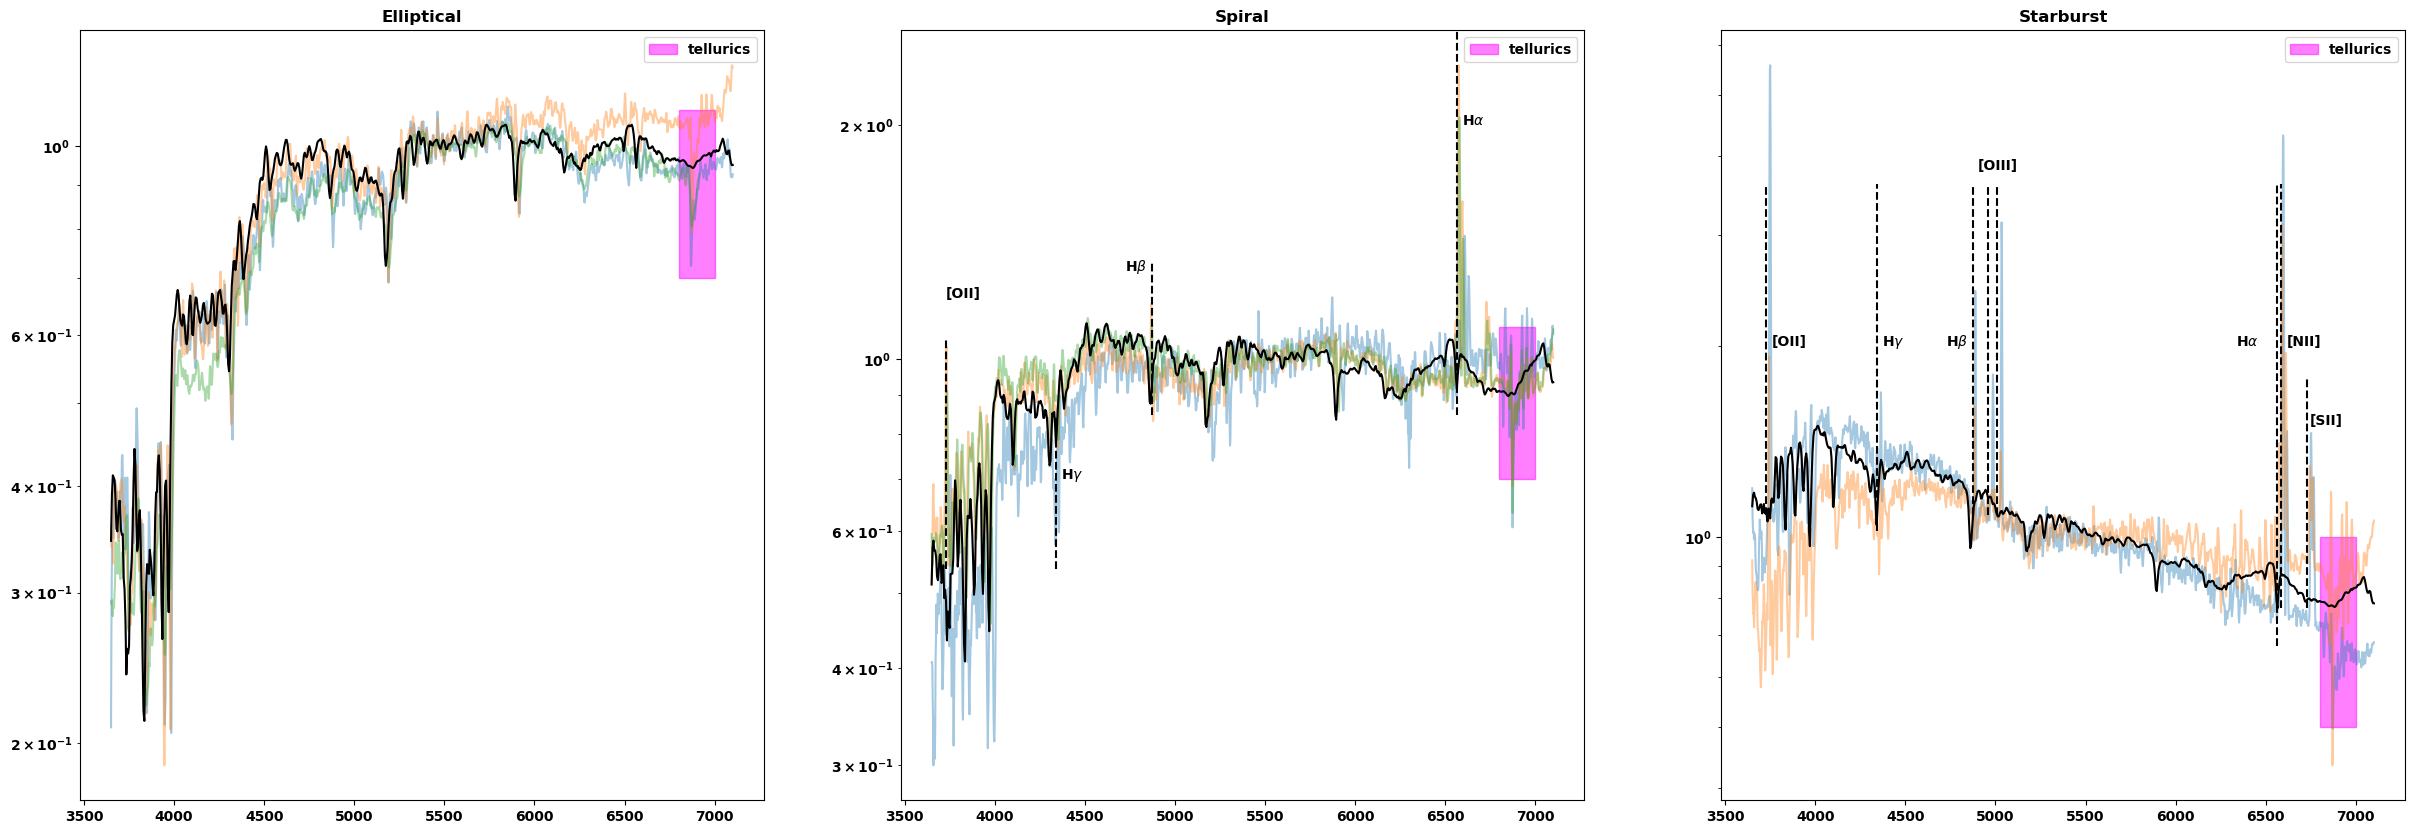

In [287]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(30, 10))
specs=[G[1],K[1],M[1],RG_1[1],RG_2[1]]
coefficients=[0.2,0.55,0.05,0.05,0.15]
result=np.zeros(len(MS_spec[5][1][500:1191]))
labels=['G','K','M','RG1','RG2']
for num,spec in enumerate(specs):
    result+=coefficients[num]*spec
ax1.plot(Gal_specs[3][0],Gal_specs[3][1],alpha=0.4)
ax1.plot(Gal_specs[5][0],Gal_specs[5][1],alpha=0.4)
ax1.plot(Gal_specs[6][0],Gal_specs[6][1],alpha=0.4)
ax1.plot(G[0],result,color='black')
ax1.set_yscale('log')

bulge_prop=0.9
disk_prop=0.1
bulge_specs=[K[1],G[1],RG_1[1],RG_2[1],M[1]]
bulge_coefficients=[0.3,0.4,0.10,0.10,0.10]
bulge_result=np.zeros(len(MS_spec[5][1][500:1191]))
for num,spec in enumerate(bulge_specs):
    bulge_result+=bulge_coefficients[num]*spec
disk_specs=[B[1],A[1],F[1],BG_1[1],BG_2[1],SG[1]]
disk_coefficients=[0.1,0.2,0.4,0.15,0.05,0.1]
disk_result=np.zeros(len(MS_spec[5][1][500:1191]))
for num,spec in enumerate(disk_specs):
    disk_result+=disk_coefficients[num]*spec
ax2.plot(Gal_specs[0][0],Gal_specs[0][1],alpha=0.4)
ax2.plot(Gal_specs[2][0],Gal_specs[2][1],alpha=0.4)
ax2.plot(Gal_specs[4][0],Gal_specs[4][1],alpha=0.4)
ax2.plot(G[0],bulge_prop*bulge_result+disk_prop*disk_result,color='black')
ax2.set_yscale('log')

bulge_prop=0.6
disk_prop=0.4
bulge_specs=[K[1],G[1],RG_1[1],RG_2[1],M[1]]
bulge_coefficients=[0.3,0.4,0.10,0.10,0.10]
bulge_result=np.zeros(len(MS_spec[5][1][500:1191]))
bulge_labels=['K','G','RG1','RG2','M']
for num,spec in enumerate(bulge_specs):
    bulge_result+=bulge_coefficients[num]*spec
disk_specs=[O[1],B[1],A[1],F[1],BG_1[1],BG_2[1]]
disk_coefficients=[0.25,0.25,0.2,0.20,0.05,0.05]
disk_result=np.zeros(len(MS_spec[5][1][500:1191]))
disk_labels=['O','B','A','F','BG1','BG2']
for num,spec in enumerate(disk_specs):
    disk_result+=disk_coefficients[num]*spec
ax3.plot(Gal_specs[7][0],Gal_specs[7][1],alpha=0.4)
ax3.plot(Gal_specs[8][0],Gal_specs[8][1],alpha=0.4)
ax3.plot(G[0],bulge_prop*bulge_result+disk_prop*disk_result,color='black')
R1=Rectangle((6800,0.7),width=200,height=0.4,alpha=0.5,color='fuchsia',label='tellurics')
R2=Rectangle((6800,0.7),width=200,height=0.4,alpha=0.5,color='fuchsia',label='tellurics')
R3=Rectangle((6800,0.5),width=200,height=0.5,alpha=0.5,color='fuchsia',label='tellurics')
#ax2.vlines(x=[])
ax1.add_artist(R1)
ax2.add_artist(R2)
ax3.add_artist(R3)
ax3.set_yscale('log')
#ax1.axvline(x=6875)
ax2.axvline(x=6563,ymin=0.5,ymax=1,ls='--',color='black')
ax2.text(6563+30,2,'H$\\alpha$')
ax2.axvline(x=4873,ymin=0.5,ymax=0.7,ls='--',color='black')
ax2.text(4873-150,1.3,'H$\\beta$')
ax2.axvline(x=3728,ymin=0.3,ymax=0.6,ls='--',color='black')
ax2.text(3728,1.2,'[OII]')
ax2.axvline(x=4340,ymin=0.3,ymax=0.5,ls='--',color='black')
ax2.text(4340+30,0.7,'H$\\gamma$')
ax3.axvline(x=6563,ymin=0.2,ymax=0.8,ls='--',color='black')
ax3.text(6563-230,2,'H$\\alpha$')
ax3.axvline(x=4960,ymin=0.37,ymax=0.8,ls='--',color='black')
ax3.text(4900,3.8,'[OIII]')
ax3.axvline(x=5008,ymin=0.37,ymax=0.8,ls='--',color='black')
ax3.axvline(x=4873,ymin=0.37,ymax=0.8,ls='--',color='black')
ax3.text(4873-150,2,'H$\\beta$')
ax3.axvline(x=3728,ymin=0.37,ymax=0.8,ls='--',color='black')
ax3.text(3728+30,2,'[OII]')
ax3.axvline(x=6730,ymin=0.25,ymax=0.55,ls='--',color='black')
ax3.text(6716+30,1.5,'[SII]')
ax3.axvline(x=6584,ymin=0.25,ymax=0.8,ls='--',color='black')
ax3.text(6584+30,2,'[NII]')
ax3.axvline(x=4340,ymin=0.35,ymax=0.8,ls='--',color='black')
ax3.text(4340+30,2,'H$\\gamma$')
ax1.legend()
ax2.legend()
ax3.legend()
ax1.set_title('Elliptical')
ax2.set_title('Spiral')
ax3.set_title('Starburst')

## Question 4 ##

#### A ####
Clear tight spiral in the image with no central bar\
Flatish spectra with H $\alpha$ and [OII] in emission as well as some other minor lines, consistent with spiral\
Therefore: Sa

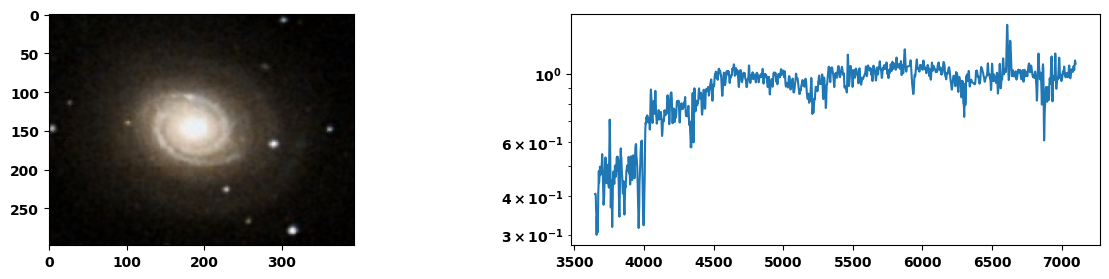

In [315]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[0])
ax1.imshow(img)
ax2.plot(Gal_specs[0][0],Gal_specs[0][1])
ax2.set_yscale('log')

#### B ####
Unclear shape in image, no clear spiral arms but not obviously elliptical, irregular-ish in shape\
Spectra shows clear significant emission lines, therefore implying starburst\
Conclusion: Irregular Starburst

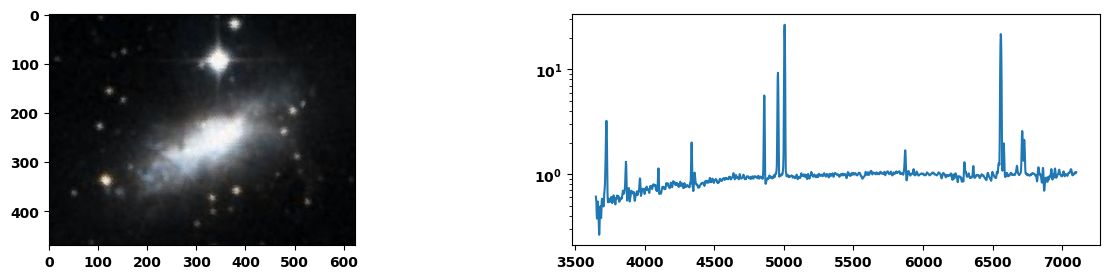

In [314]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[1])
ax1.imshow(img)
ax2.plot(Gal_specs[1][0],Gal_specs[1][1])
ax2.set_yscale('log')

#### C ####
Clear spiral shape from image with some semblance of a bar, spirals moderately tight\
Spectra also consistent of spiral with strong H $\alpha$ and slight other emission and absorption features\
Conclusion: SBb

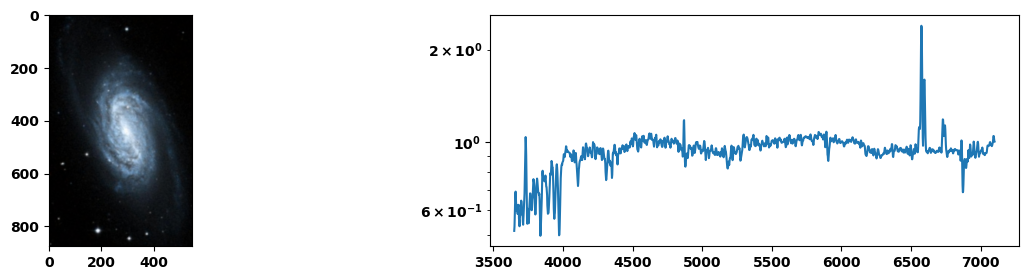

In [313]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[2])
ax1.imshow(img)
ax2.plot(Gal_specs[2][0],Gal_specs[2][1])
ax2.set_yscale('log')

#### D ####
Image clearly shows elliptical galaxy, although strongly inclined\
Spectra agrees with this, showing flat spectra containing some stellar absoprtion lines\
Conclusion: E5

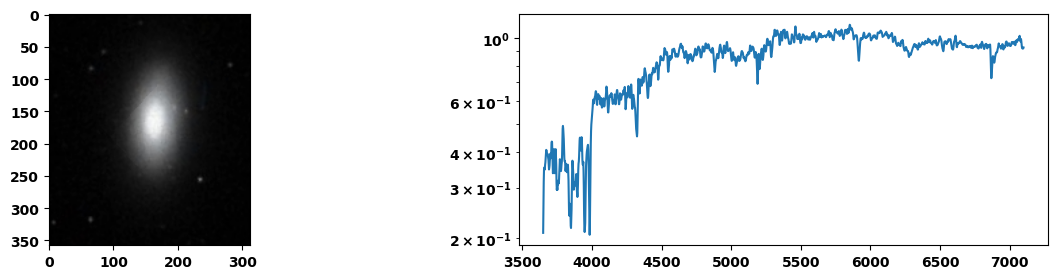

In [312]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[3])
ax1.imshow(img)
ax2.plot(Gal_specs[3][0],Gal_specs[3][1])
ax2.set_yscale('log')

#### E ####
Image clearly shows loosely bound spiral shape with a central bar\
Spectra agrees with this showing largely flat spectrum with strong H $\alpha$ emission alongside other minor absoprtion and emission features\
Conclusion: SBc

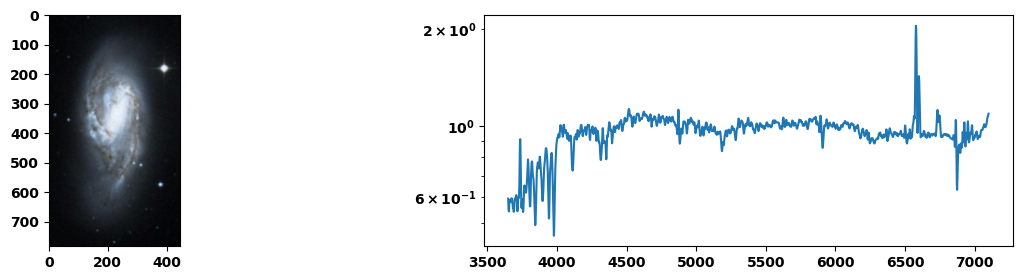

In [316]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[4])
ax1.imshow(img)
ax2.plot(Gal_specs[4][0],Gal_specs[4][1])
ax2.set_yscale('log')

#### F ####
Image shows relatively circular elliptical galaxy\
Spectra agrees with largely flat spectrum with some stellar absoprtion lines present\
Conclusion: E0 or E1

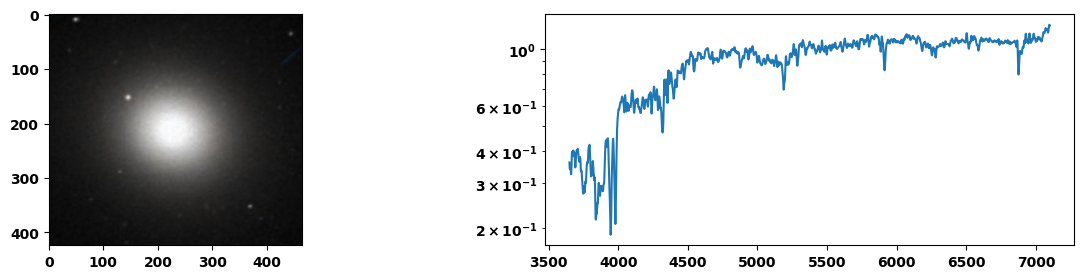

In [317]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[5])
ax1.imshow(img)
ax2.plot(Gal_specs[5][0],Gal_specs[5][1])
ax2.set_yscale('log')

#### G ####
Image shows clear elliptical galaxy with slightly oblate shape\
Spectra agrees with elliptical classification being largely flat with some stellar absorption lines\
Conclusion: E2 or E3

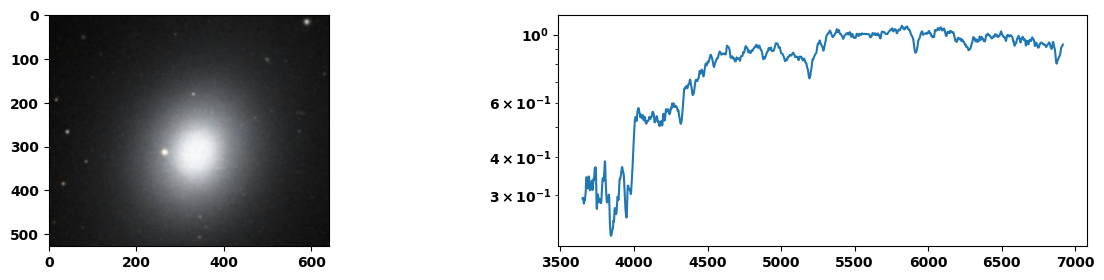

In [318]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[6])
ax1.imshow(img)
ax2.plot(Gal_specs[6][0],Gal_specs[6][1])
ax2.set_yscale('log')

#### H ####
Image shows irregular shaped galaxy although contains some tight spiral structure, noticable near to the outside but away from the top left\
Spectra clearly shows starburst galaxy with significant emission lines and blue continuum\
Conclusion: Irregular starburst although could be Sa Starburst

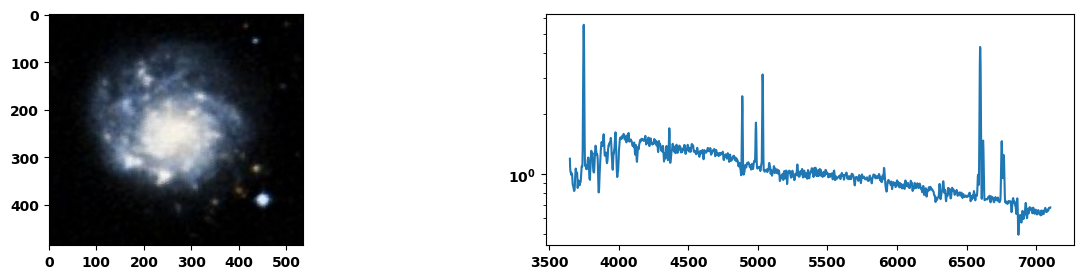

In [319]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[7])
ax1.imshow(img)
ax2.plot(Gal_specs[7][0],Gal_specs[7][1])
ax2.set_yscale('log')

#### I ####
Image shows clear spiral structure with central bar, spiral structure is moderately tight\
Spectra agrees with spiral classification showing strong H $\alpha$ flux, however quite strong line emission and significant blue continuum emission indicating star burst\
Conclusion: Starbursting SBb

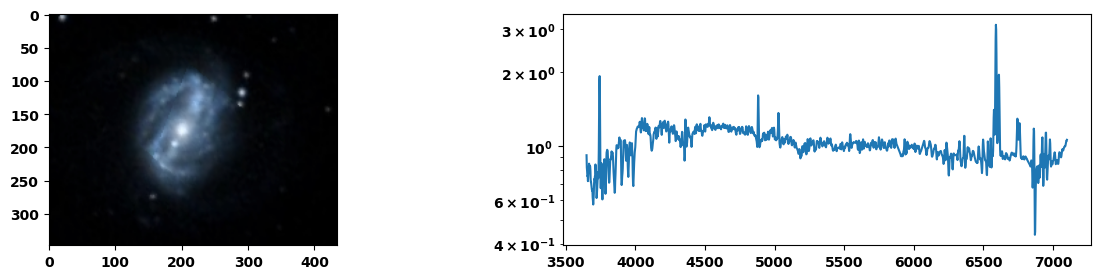

In [320]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,3))
img=plt.imread(gals_pics[8])
ax1.imshow(img)
ax2.plot(Gal_specs[8][0],Gal_specs[8][1])
ax2.set_yscale('log')